# Loan Default Prediction Project 

__Aim__ - To Create a model that predicts whether or not a loan will default using the historical data.

__Problem Statement__ - For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, we will build a deep learning model to predict the chance of default for future loans. 

__Data Dictionary__ :-
    
__credit criteria meet__: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

__purpose__: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

__interest rate__: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

__installment__: The monthly installments owed by the borrower if the loan is funded.

__log of income__: The natural log of the self-reported annual income of the borrower.

__debt income ratio__: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

__fico score__: The FICO credit score of the borrower.

__days with credit line__: The number of days the borrower has had a credit line.

__revolving balance__: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

__revolving utilization__: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

__inquiry last 6months__: The borrower's number of inquiries by creditors in the last 6 months.

__times surpassed payment in 2yrs__: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

__derogatory public record__: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [57]:
#Importing the required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Dataset
df=pd.read_csv('loan_data.csv')
df.head()

,credit_criteria_meet,purpose,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record,loan_defaulted
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   credit_criteria_meet             9578 non-null   int64  
 1   purpose                          9578 non-null   object 
 2   interest_rate                    9578 non-null   float64
 3   installment                      9578 non-null   float64
 4   log_of_income                    9578 non-null   float64
 5   debt_income_ratio                9578 non-null   float64
 6   fico_score                       9578 non-null   int64  
 7   days_with_credit_line            9578 non-null   float64
 8   revolving_balance                9578 non-null   int64  
 9   revolving_utilization            9578 non-null   float64
 10  inquiry_last_6months             9578 non-null   int64  
 11  times_surpassed_payment_in_2yrs  9578 non-null   int64  
 12  derogatory_public_re

In [4]:
df.isna().sum()

credit_criteria_meet               0
purpose                            0
interest_rate                      0
installment                        0
log_of_income                      0
debt_income_ratio                  0
fico_score                         0
days_with_credit_line              0
revolving_balance                  0
revolving_utilization              0
inquiry_last_6months               0
times_surpassed_payment_in_2yrs    0
derogatory_public_record           0
loan_defaulted                     0
dtype: int64

There are no null values present in the data.

# Univariate Analysis

__Analysing Column --->  credit_criteria_meet__

In [5]:
#Finding the unique values in column 'credit_criteria_meet'.
df['credit_criteria_meet'].unique()

array([1, 0], dtype=int64)

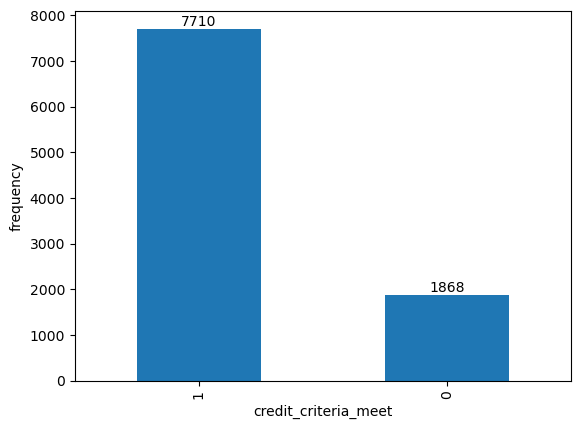

In [59]:
ax=df['credit_criteria_meet'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('credit_criteria_meet')
plt.ylabel('frequency')
plt.show()

From the above plot we can infer that there are very small number of customers who do not meet the __Credit Policy Criteria__ as compared to those who meet.

__Analysing Column --->  purpose__

In [7]:
#Finding the unique values in column 'purpose'.
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [8]:
#So there are 7 different purposes for which loan are taken.
df['purpose'].nunique()

7

Text(0, 0.5, 'purpose of loan')

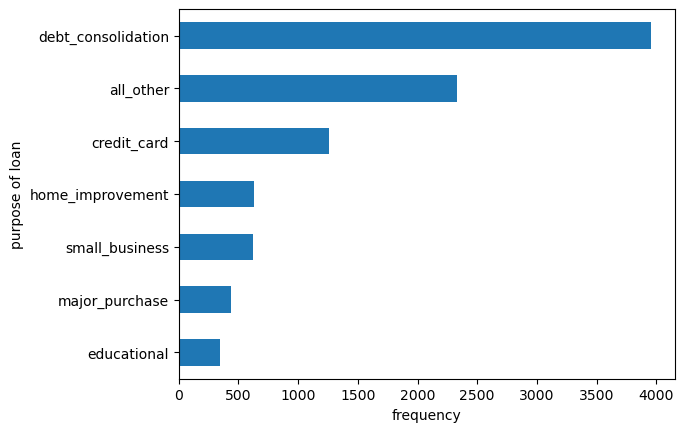

In [61]:
df['purpose'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('frequency')
plt.ylabel('purpose of loan')

From the above plot we can infer that maximum times the loan is taken for __'Loan consolidaton'__ Purpose.

__Analysing Column --->  interest_rates__

In [10]:
#Finding the 5 point summary of column 'Interest Rate'
df['interest_rate'].describe()[['min','max','mean','50%','std']]

min     0.060000
max     0.216400
mean    0.122640
50%     0.122100
std     0.026847
Name: interest_rate, dtype: float64

<AxesSubplot:xlabel='interest_rate', ylabel='Count'>

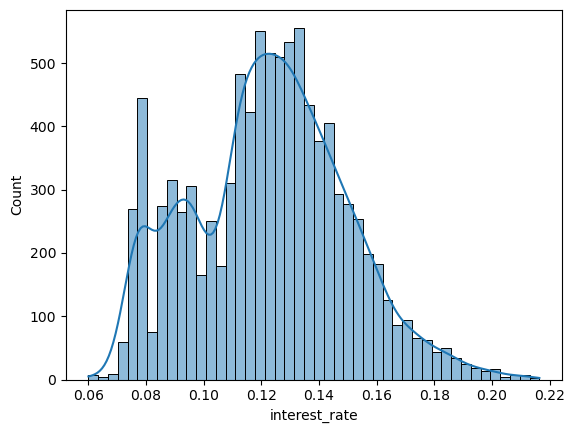

In [11]:
#Finding the distribution of data in 'Interest Rate' column.
sns.histplot(df['interest_rate'],kde=True)

Clearly the data is not normally distributed due to the presence  of Outliers.

__Analysing Column --->  installment__

In [12]:
#Finding the 5 point summary of column 'Installment'.
df['installment'].describe()[['min','max','mean','50%','std']]

min      15.670000
max     940.140000
mean    319.089413
50%     268.950000
std     207.071301
Name: installment, dtype: float64

<AxesSubplot:xlabel='installment', ylabel='Count'>

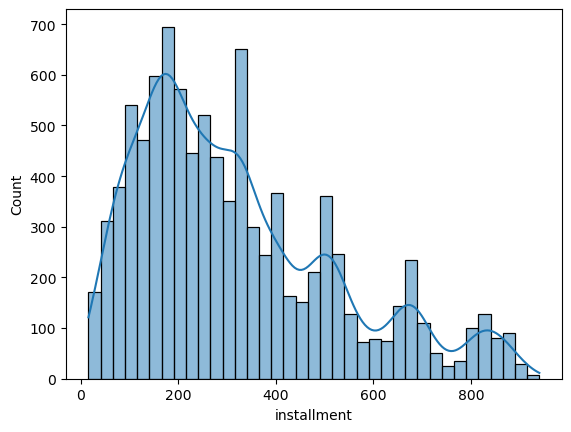

In [13]:
#Finding the distribution of data in 'Installment' column.
sns.histplot(df['installment'],kde=True)

Clearly the distribution of data is Positively skewed due to the presence of Outliers at right tail.

__Analysing Column --->  log_of_income__

In [14]:
#Finding the 5 point summary of column 'Log of income'.
df['log_of_income'].describe()[['min','max','mean','50%','std']]

min      7.547502
max     14.528354
mean    10.932117
50%     10.928884
std      0.614813
Name: log_of_income, dtype: float64

<AxesSubplot:xlabel='log_of_income', ylabel='Count'>

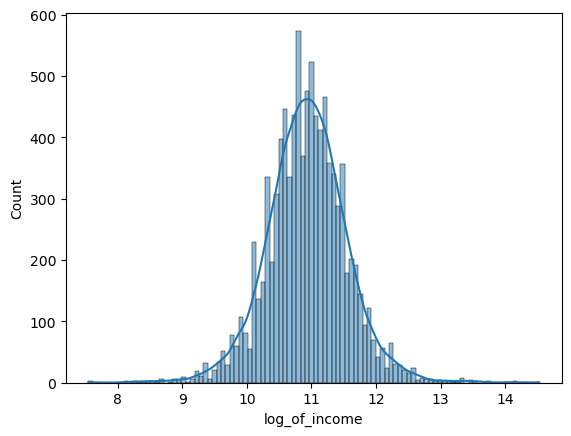

In [15]:
#Finding the distribution of data in 'Log of income' column.
sns.histplot(df['log_of_income'],kde=True)

The data seems to be normally distributed for column 'Log of income' but there are Outliers present at both tails.

__Analysing Column --->  debt_income_ratio__

In [16]:
#Finding the 5 point summary of column 'debt_income_ratio'.
df['debt_income_ratio'].describe()[['min','max','mean','50%','std']]

min      0.000000
max     29.960000
mean    12.606679
50%     12.665000
std      6.883970
Name: debt_income_ratio, dtype: float64

<AxesSubplot:xlabel='debt_income_ratio', ylabel='Count'>

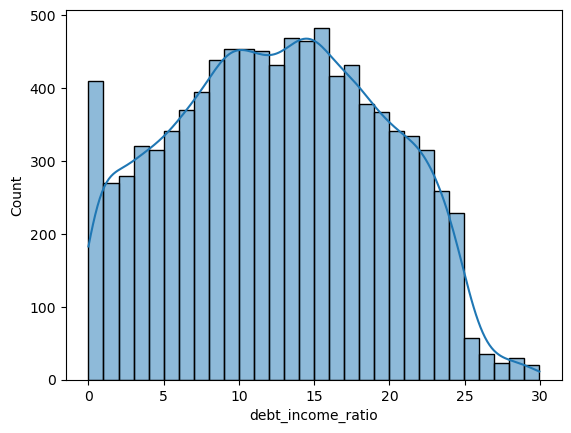

In [17]:
#Finding the distribution of data in 'debt_income_ratio' column.
sns.histplot(df['debt_income_ratio'],kde=True)

The data is not normally distributed but also no outliers are present in the column 'debt_income_ratio'.

__Analysing Column --->  fico_score__

In [18]:
#Finding the 5 point summary of column 'fico score'.
df['fico_score'].describe()[['min','max','mean','50%','std']]

min     612.000000
max     827.000000
mean    710.846314
50%     707.000000
std      37.970537
Name: fico_score, dtype: float64

<AxesSubplot:xlabel='fico_score', ylabel='Count'>

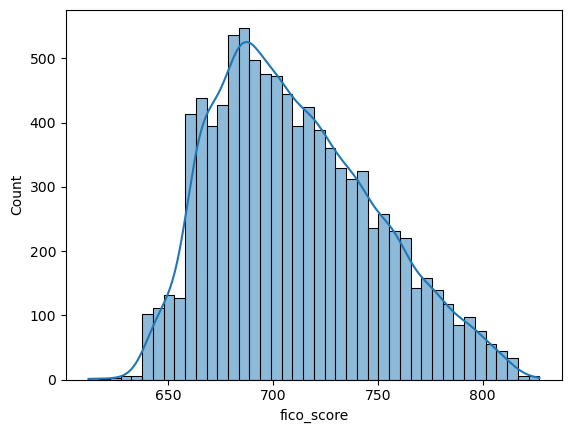

In [19]:
#Finding the distribution of data in 'Fico score' column.
sns.histplot(df['fico_score'],kde=True)

The data is not normally distributed but also no outliers are present in the column 'Fico Score'.

__Analysing Column --->  days_with_credit_line__

In [20]:
#Finding the 5 point summary of column 'days_with_credit_line'.
df['days_with_credit_line'].describe()[['min','max','mean','50%','std']]

min       178.958333
max     17639.958330
mean     4560.767197
50%      4139.958333
std      2496.930377
Name: days_with_credit_line, dtype: float64

<AxesSubplot:xlabel='days_with_credit_line', ylabel='Count'>

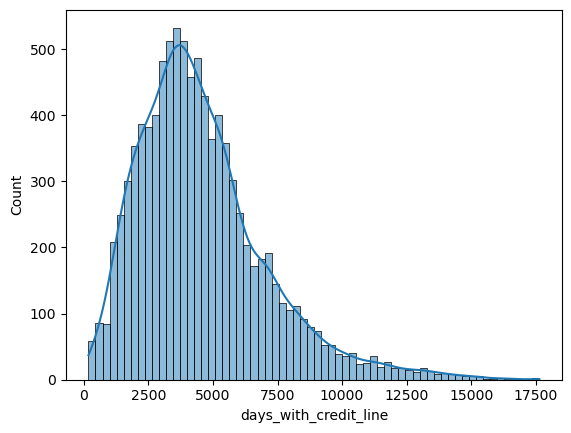

In [21]:
#Finding the distribution of data in 'days_with_credit_line' column.
sns.histplot(df['days_with_credit_line'],kde=True)

Clearly the distribution of data is Positively skewed due to the presence of Outliers at right tail.

__Analysing Column --->  revolving_balance__

In [22]:
#Finding the 5 point summary of column 'revolving_balance'.
df['revolving_balance'].describe()[['min','max','mean','50%','std']]

min     0.000000e+00
max     1.207359e+06
mean    1.691396e+04
50%     8.596000e+03
std     3.375619e+04
Name: revolving_balance, dtype: float64

<AxesSubplot:xlabel='revolving_balance', ylabel='Count'>

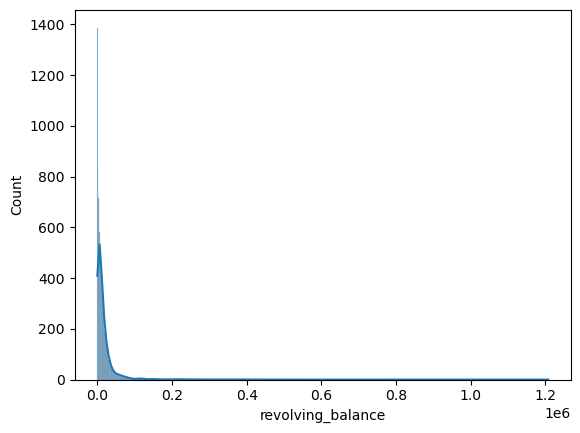

In [23]:
#Finding the distribution of data in 'revolving_balance' column.
sns.histplot(df['revolving_balance'],kde=True)

Clearly the distribution of data is Positively skewed due to the presence of Outliers at right tail.

__Analysing Column --->  revolving_utilization__

In [24]:
#Finding the 5 point summary of column 'revolving_utilization'.
df['revolving_utilization'].describe()[['min','max','mean','50%','std']]

min       0.000000
max     119.000000
mean     46.799236
50%      46.300000
std      29.014417
Name: revolving_utilization, dtype: float64

<AxesSubplot:xlabel='revolving_utilization', ylabel='Count'>

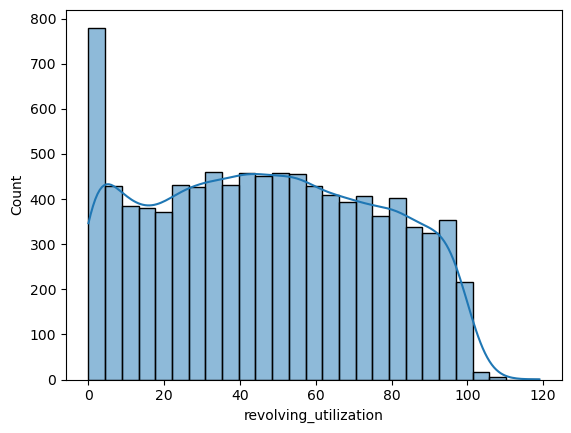

In [25]:
#Finding the distribution of data in 'revolving_utilization' column.
sns.histplot(df['revolving_utilization'],kde=True)

The data is not normally distributed but also no outliers are present in the column 'revolving utilization'.

__Analysing Column --->  inquiry_last_6months__

In [26]:
#Finding the unique values for the column 'inquiry_last_6months'.
df['inquiry_last_6months'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7, 33,  9, 18, 14, 15, 13, 12, 10,
       19, 11, 16, 20, 27, 25, 28, 31, 24, 17, 32], dtype=int64)

In [27]:
#Thus the average number of query done by customers in the last 6 months is around 1.5.
df['inquiry_last_6months'].mean()

1.5774692002505741

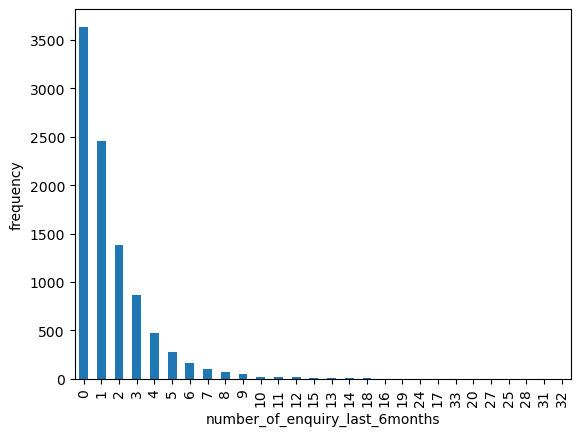

In [65]:
#Finding the distribution of data in 'inquiry_last_6months' column.
df['inquiry_last_6months'].value_counts().plot(kind='bar')
plt.xlabel('number_of_enquiry_last_6months')
plt.ylabel('frequency')
plt.show()

__Analysing Column --->  times_surpassed_payment_in_2yrs__

In [29]:
df['times_surpassed_payment_in_2yrs'].unique()

array([ 0,  1,  2,  4,  3,  5,  6, 13,  7,  8, 11], dtype=int64)

In [30]:
#Thus the average number of times the customers have surpassed the due date of payment of loan emi is around 0.16.
df['times_surpassed_payment_in_2yrs'].mean()

0.1637084986427229

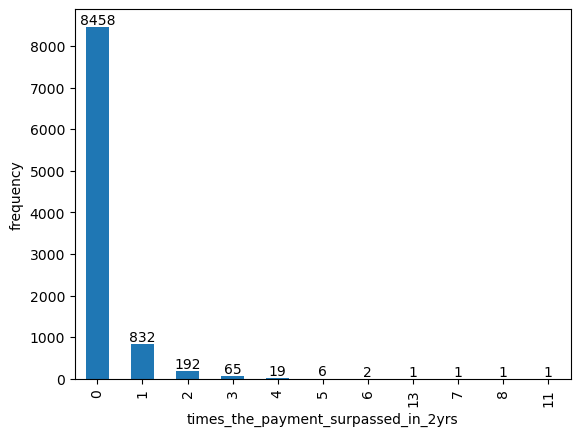

In [66]:
ax=df['times_surpassed_payment_in_2yrs'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('times_the_payment_surpassed_in_2yrs')
plt.ylabel('frequency')
plt.show()

__Analysing Column --->  derogatory_public_record__

In [32]:
df['derogatory_public_record'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [33]:
df['derogatory_public_record'].nunique()

6

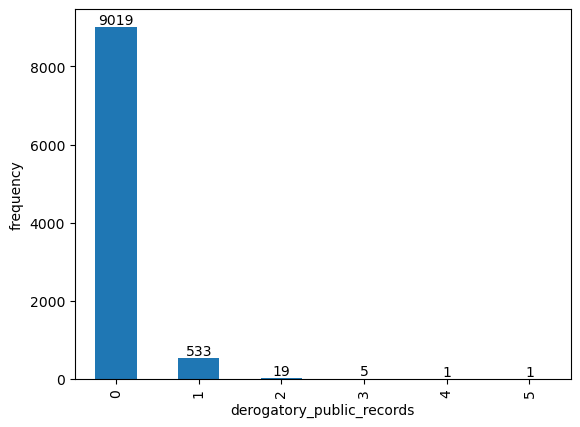

In [67]:
ax=df['derogatory_public_record'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('derogatory_public_records')
plt.ylabel('frequency')
plt.show()

There is large number of customers who do not have any derogatory public records of them.

__Analysing Column --->  loan_defaulted__

In [35]:
df['loan_defaulted'].unique()

array([0, 1], dtype=int64)

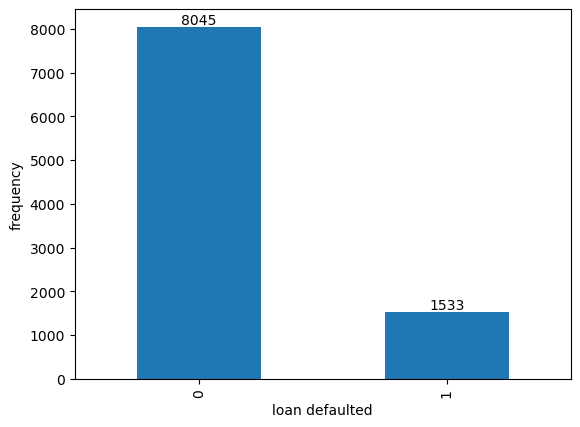

In [68]:
ax=df['loan_defaulted'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('loan defaulted')
plt.ylabel('frequency')
plt.show()

From the above plot we can clearly see that the number of customers who have defaulted the loan is very small as compared to those who have not. This is a problem of data imbalance. We will fix it before building Deep Learning model.

# Bivariate Analysis

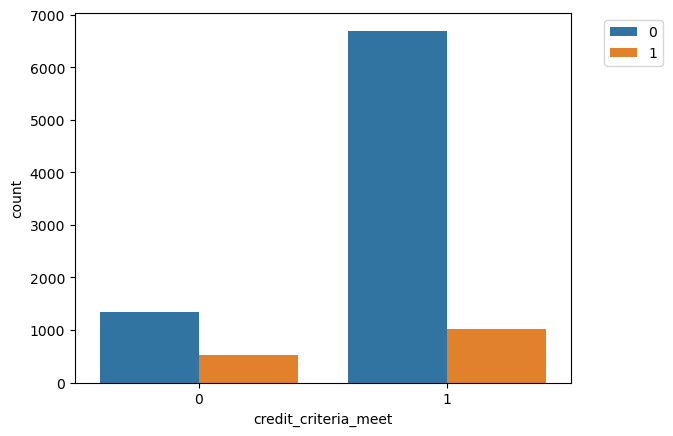

In [37]:
sns.countplot(df['credit_criteria_meet'],hue=df['loan_defaulted'])
plt.legend(bbox_to_anchor=(1.2,1))

From the above plot we can infer that the percentage of customers who have not met the credit criteria are more likely to default than those who have met. 

Text(0, 0.5, 'purpose of loan')

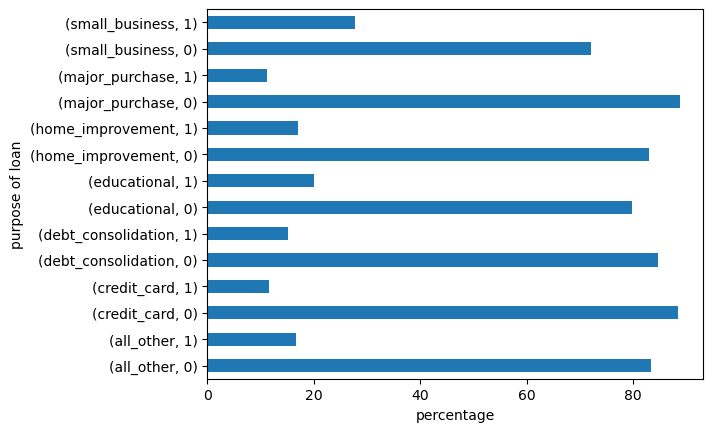

In [69]:
(df.groupby(df['purpose']).loan_defaulted.value_counts(sum)*100).plot(kind='barh')
plt.xlabel('percentage')
plt.ylabel('purpose of loan')

From the above plot we can infer that the percentage of customers who have taken loan for small business are more likely to default than those taken loan for other purposes. 

<AxesSubplot:xlabel='interest_rate', ylabel='Density'>

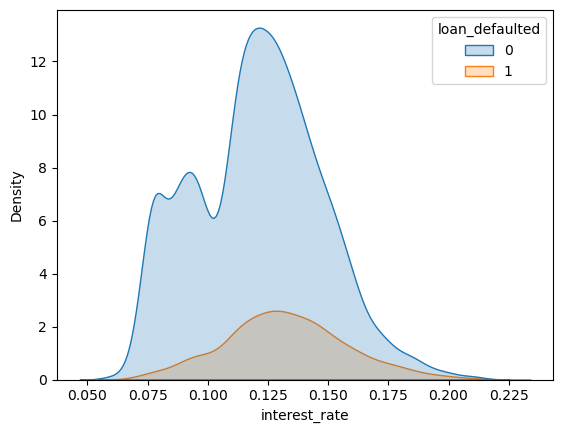

In [39]:
sns.kdeplot(df['interest_rate'],fill=True,hue=df['loan_defaulted'])

From the above plot we can infer that as the interest rate increases the likelihood of loan default increases and reachs maximum at 13%.

<AxesSubplot:xlabel='revolving_utilization', ylabel='interest_rate'>

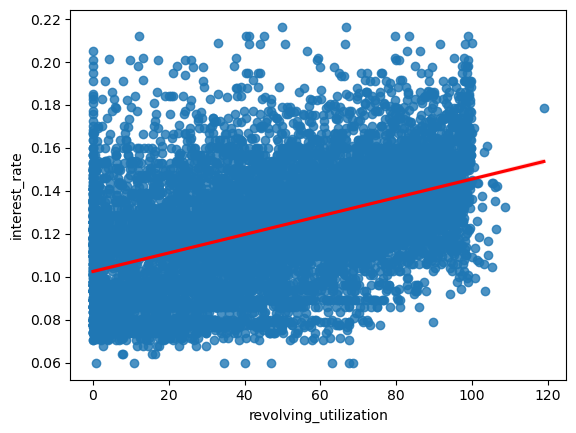

In [40]:
sns.regplot(x=df['revolving_utilization'],y=df['interest_rate'],line_kws={'color':'red'})

From the above plot we can infer that there is somewhat positive relationship between 'revolving utilization' and 'interest rate'.

<AxesSubplot:xlabel='installment', ylabel='Density'>

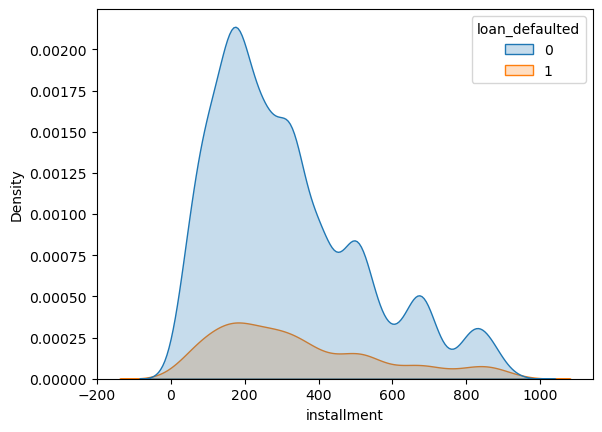

In [41]:
sns.kdeplot(df['installment'],fill=True,hue=df['loan_defaulted'])

From the above plot we can infer that customers with less installment amount are more likely to default on loan.

<AxesSubplot:xlabel='log_of_income', ylabel='Density'>

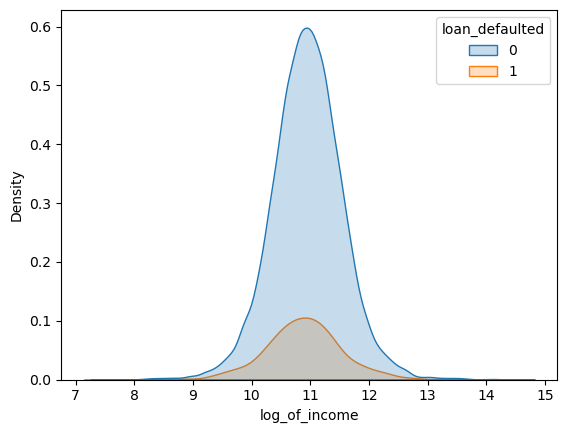

In [42]:
sns.kdeplot(df['log_of_income'],fill=True,hue=df['loan_defaulted'])

From the above plot we can infer that as the income increases the likelihood of loan default also increases.

<AxesSubplot:xlabel='debt_income_ratio', ylabel='Density'>

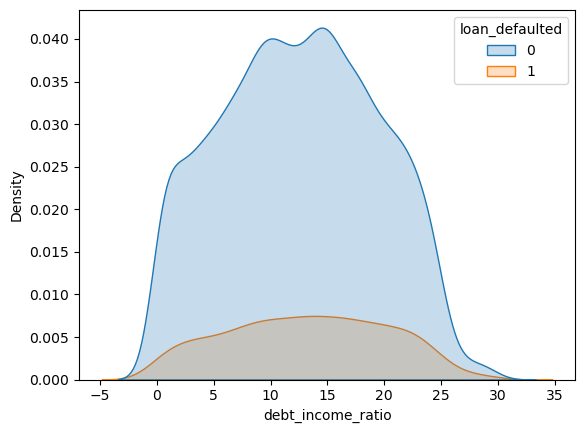

In [43]:
sns.kdeplot(df['debt_income_ratio'],fill=True,hue=df['loan_defaulted'])

From the above plot we can infer that as the debt to income ratio increases the likelihood of loan default also increases.

<AxesSubplot:xlabel='fico_score', ylabel='Density'>

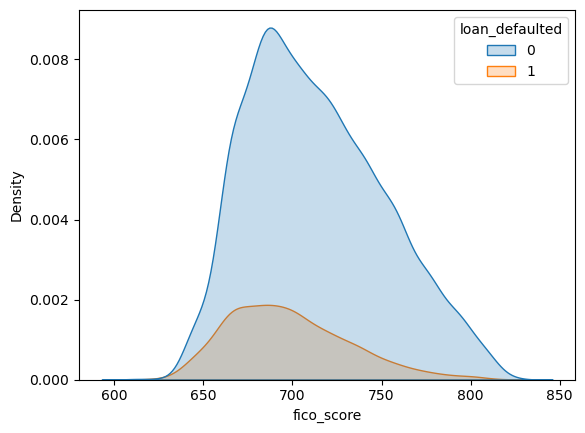

In [44]:
sns.kdeplot(df['fico_score'],fill=True,hue=df['loan_defaulted'])

From the above plot we can infer that customers with low fico score are more likely to default on loan.

<AxesSubplot:xlabel='fico_score', ylabel='interest_rate'>

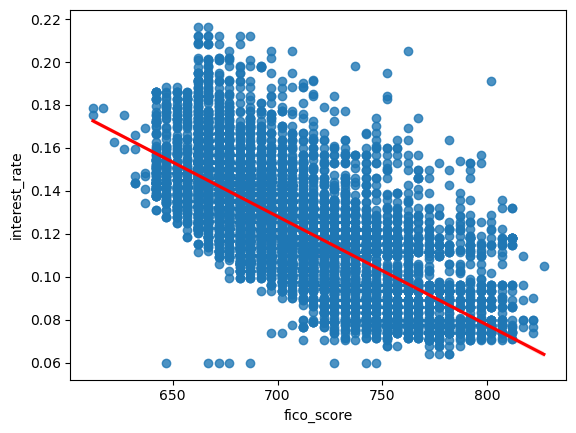

In [45]:
sns.regplot(x=df['fico_score'],y=df['interest_rate'],line_kws={'color':'red'})

From the above plot we can infer that there is inverse relationship between 'interest rate' and 'fico score'.

<AxesSubplot:xlabel='days_with_credit_line', ylabel='Density'>

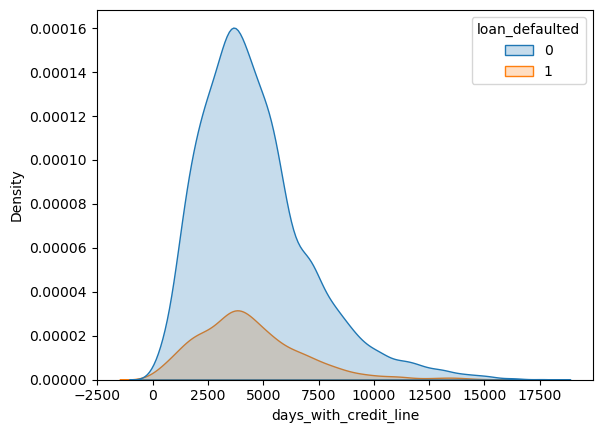

In [46]:
sns.kdeplot(df['days_with_credit_line'],fill=True,hue=df['loan_defaulted'])

From the above plot we can infer that customers with low days with credit line are more likely to default on loan.

<AxesSubplot:xlabel='revolving_balance', ylabel='Density'>

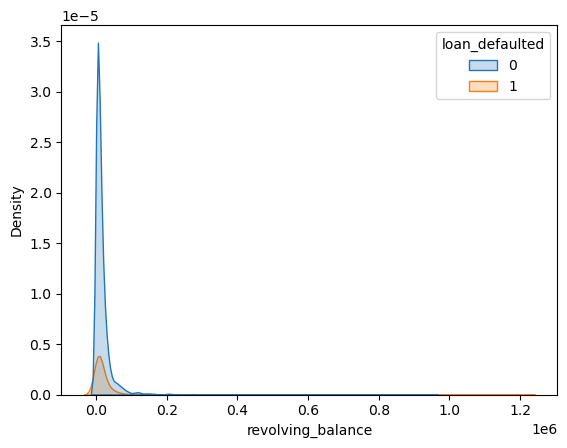

In [47]:
sns.kdeplot(df['revolving_balance'],fill=True,hue=df['loan_defaulted'])

From the above plot we can infer that customers with low 'revolving balance' are more likely to default on loan.

<AxesSubplot:xlabel='revolving_balance', ylabel='revolving_utilization'>

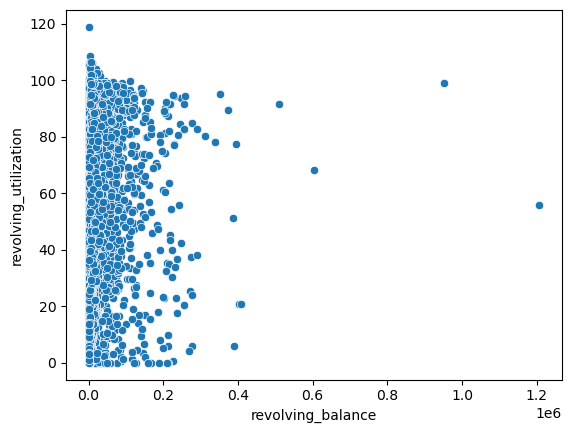

In [48]:
sns.scatterplot(x=df['revolving_balance'],y=df['revolving_utilization'])

From the above plot we can infer that there is highly positive relationship between 'revolving balance' and 'revolving utilization'.

<AxesSubplot:xlabel='revolving_utilization', ylabel='Density'>

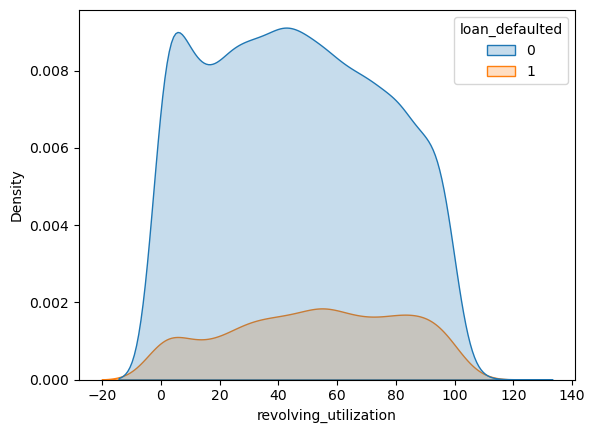

In [49]:
sns.kdeplot(df['revolving_utilization'],fill=True,hue=df['loan_defaulted'])

From the above plot we can infer that as the revolving utilization increases the likelihood of loan default also increases.

<AxesSubplot:xlabel='revolving_utilization', ylabel='fico_score'>

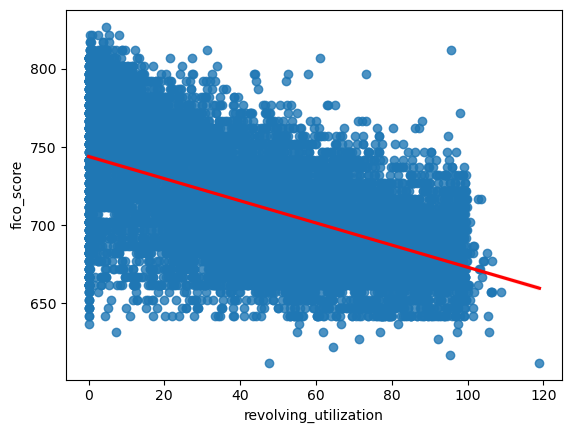

In [50]:
sns.regplot(x=df['revolving_utilization'],y=df['fico_score'],line_kws={'color':'red'})

From the above plot we can infer that there is inverse relationship between 'revolving utilization' and 'fico score'.

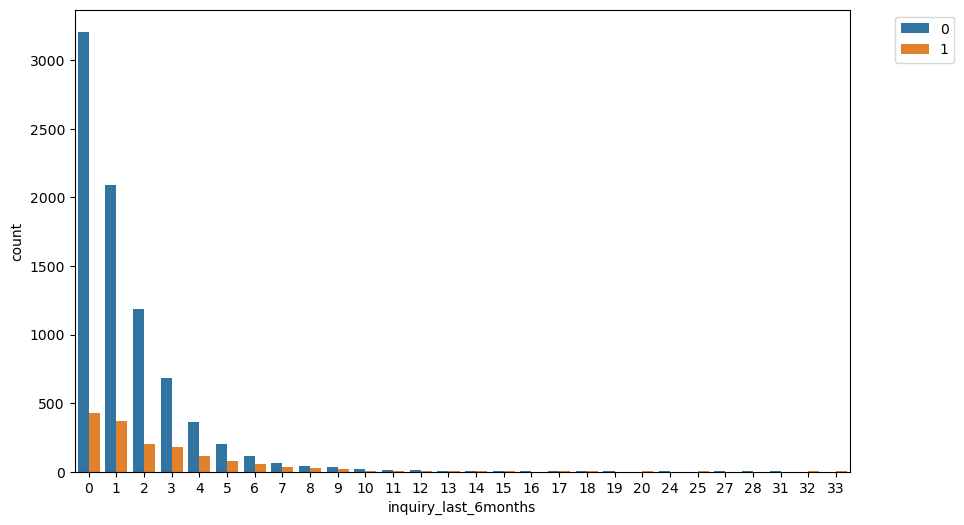

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(df['inquiry_last_6months'],hue=df['loan_defaulted'])
plt.legend(bbox_to_anchor=(1.05,1))

<AxesSubplot:xlabel='inquiry_last_6months', ylabel='credit_criteria_meet'>

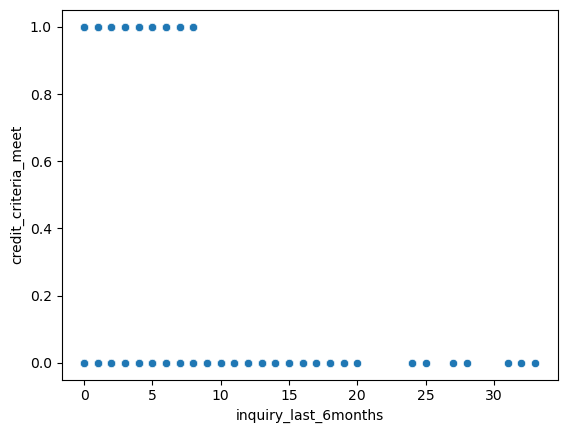

In [52]:
sns.scatterplot(y=df['credit_criteria_meet'],x=df['inquiry_last_6months'])

From the above plot we can infer that the customers who have done query for more than 10 times in last 6 momnths are less likely to meet the credit criteria.

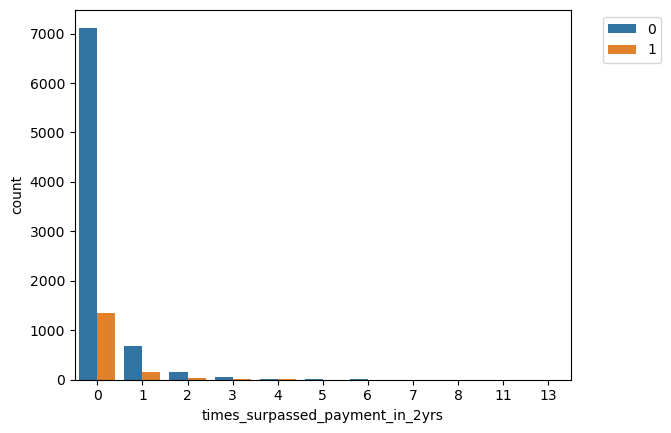

In [53]:
sns.countplot(df['times_surpassed_payment_in_2yrs'],hue=df['loan_defaulted'])
plt.legend(bbox_to_anchor=(1.05,1))

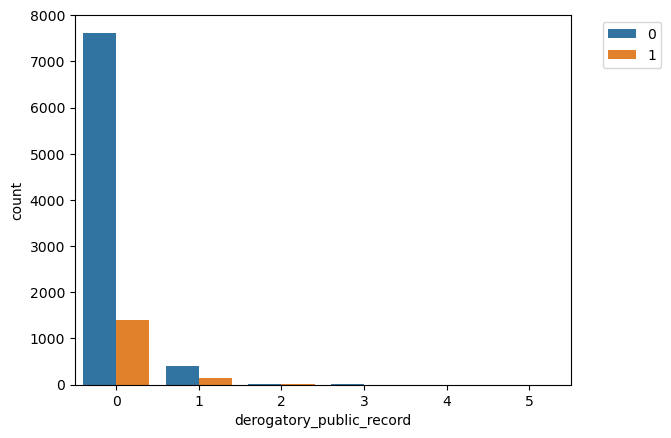

In [54]:
sns.countplot(df['derogatory_public_record'],hue=df['loan_defaulted'])
plt.legend(bbox_to_anchor=(1.05,1))

# Multivariate Analysis

<AxesSubplot:>

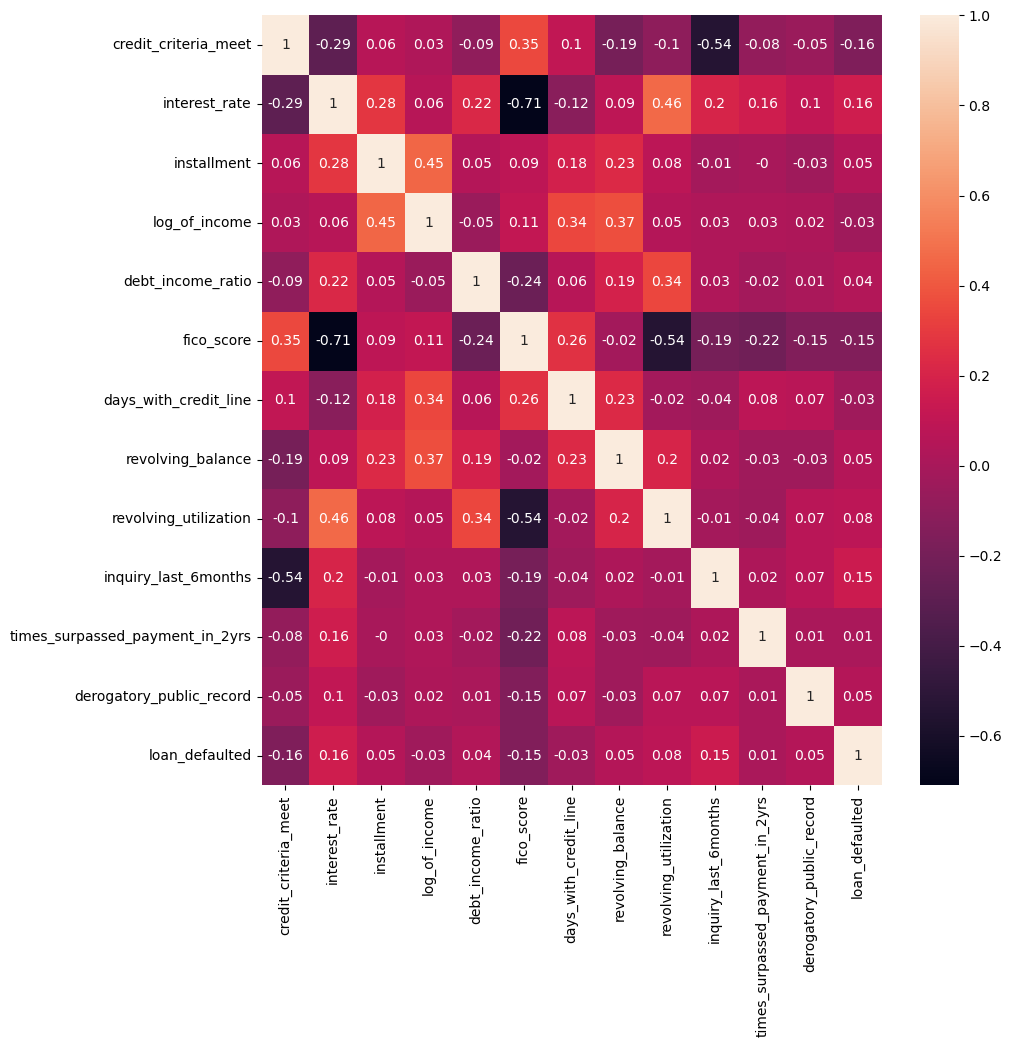

In [55]:
#Finding the correlation between different columns in te data.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2),annot=True)

From the above plot we can infer that:-

1) There is high -ve collinearity between fico score and interest rate.

2) There is  high -ve collinearity between fico score and revolving utilization. 

3) There is  high -ve collinearity between enquiry last 6 months and credit criteria meet

Text(0, 0.5, 'features')

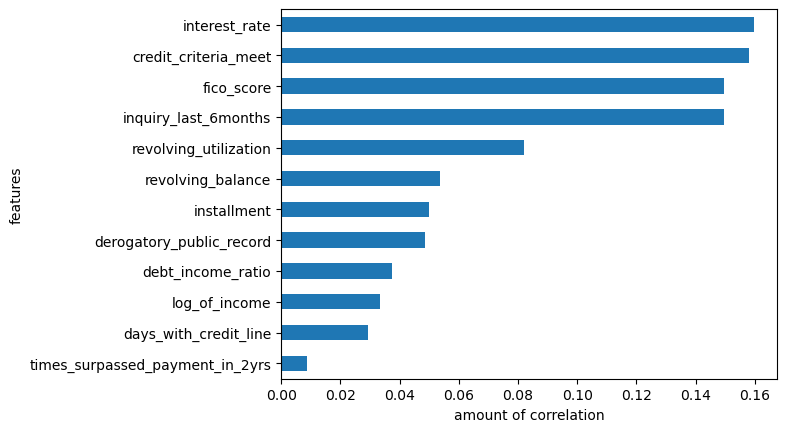

In [70]:
#Finding the correlation of all features with target variable ( Loan defaulted ).
s=df.corr()
s['loan_defaulted'].abs().sort_values().head(12).plot(kind='barh')
plt.xlabel('amount of correlation')
plt.ylabel('features')

Clearly Interset Rate and Credit criteria meet has the highest correlation with Loan Deafulted.